In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('ml2020spring-hw1/train.csv',header = None, encoding = 'big5')
test = pd.read_csv('ml2020spring-hw1/test.csv',header = None, encoding = 'big5')
train[train=='NR'] = 0
test[test=='NR'] = 0

## Extract Features

In [3]:
dates = train[0][1:].unique()
features = train[2][1:].unique()
train_df = pd.DataFrame()
for date in dates:
    date_range = pd.date_range(start=date, periods=24,freq='1h')
    daily_df = pd.DataFrame(index=date_range)
    for feature in features:
        daily_df[feature] = train.loc[(train[0]==date)&(train[2]==feature)].values[0][3:]
    train_df = train_df.append(daily_df)
train_df.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
2014-01-01 00:00:00,14,1.8,0.51,0.2,0.9,16,17,16,56,26,0,77,1.8,2,37,35,1.4,0.5
2014-01-01 01:00:00,14,1.8,0.41,0.15,0.6,9.2,9.8,30,50,39,0,68,2,2,80,79,1.8,0.9
2014-01-01 02:00:00,14,1.8,0.39,0.13,0.5,8.2,8.7,27,48,36,0,67,1.7,2,57,2.4,1,0.6
2014-01-01 03:00:00,13,1.8,0.37,0.12,1.7,6.9,8.6,23,35,35,0,74,1.6,1.9,76,55,0.6,0.3
2014-01-01 04:00:00,12,1.8,0.35,0.11,1.8,6.8,8.5,24,25,31,0,72,1.9,1.9,110,94,1.7,0.6


In [4]:
timeDim = len(train_df.index[9:])
featureDim = train_df.shape[1] * 9 + 1
trainFrame = np.empty([timeDim, featureDim])
for ind in np.arange(timeDim):
    trainFrame[ind,:featureDim-1] = np.array(train_df.iloc[ind:9+ind].T).reshape(1,-1)[0]
    trainFrame[ind,featureDim-1] = train_df.iloc[ind+9]['PM2.5']
trainFrame = pd.DataFrame(trainFrame,index=train_df.index[9:])
trainFrame.rename(columns={162:'PM2.5'},inplace=True)
trainFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,PM2.5
2014-01-01 09:00:00,14.0,14.0,14.0,13.0,12.0,12.0,12.0,12.0,15.0,1.8,...,0.5,0.9,0.6,0.3,0.6,1.9,2.0,2.0,0.5,30.0
2014-01-01 10:00:00,14.0,14.0,13.0,12.0,12.0,12.0,12.0,15.0,17.0,1.8,...,0.9,0.6,0.3,0.6,1.9,2.0,2.0,0.5,0.3,41.0
2014-01-01 11:00:00,14.0,13.0,12.0,12.0,12.0,12.0,15.0,17.0,20.0,1.8,...,0.6,0.3,0.6,1.9,2.0,2.0,0.5,0.3,0.8,44.0
2014-01-01 12:00:00,13.0,12.0,12.0,12.0,12.0,15.0,17.0,20.0,22.0,1.8,...,0.3,0.6,1.9,2.0,2.0,0.5,0.3,0.8,1.2,33.0
2014-01-01 13:00:00,12.0,12.0,12.0,12.0,15.0,17.0,20.0,22.0,22.0,1.8,...,0.6,1.9,2.0,2.0,0.5,0.3,0.8,1.2,2.0,37.0


## Split into train and test datasets

In [5]:
X_train , y_train = trainFrame.iloc[:int(timeDim * 0.8)].drop('PM2.5',axis=1),trainFrame.iloc[:int(timeDim * 0.8)]['PM2.5']
X_test , y_test = trainFrame.iloc[int(timeDim * 0.8):].drop('PM2.5',axis=1),trainFrame.iloc[int(timeDim * 0.8):]['PM2.5']

## Normalization

In [6]:
train_means = X_train.mean()
train_stds = X_train.std()
X_train = X_train.transform(lambda x:(x-np.mean(x))/np.std(x))
X_test = (X_test-train_means)/train_stds

In [7]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
2014-01-01 09:00:00,-1.451071,-1.451792,-1.452486,-1.608545,-1.764801,-1.765770,-1.766773,-1.767777,-1.301680,0.971064,...,-1.593438,-1.153128,-0.794431,-1.063760,-1.333196,-1.064179,0.102077,0.191536,0.191536,-1.154270
2014-01-01 10:00:00,-1.451071,-1.451792,-1.607872,-1.763967,-1.764801,-1.765770,-1.766773,-1.300906,-0.990328,0.971064,...,-1.410389,-0.794293,-1.063578,-1.332923,-1.064006,0.102419,0.191823,0.191536,-1.154426,-1.333729
2014-01-01 11:00:00,-1.451071,-1.607144,-1.763259,-1.763967,-1.764801,-1.765770,-1.300060,-0.989658,-0.523301,0.971064,...,-0.678195,-1.063419,-1.332724,-1.063760,0.102488,0.192157,0.191823,-1.154426,-1.333888,-0.885082
2014-01-01 12:00:00,-1.606393,-1.762496,-1.763259,-1.763967,-1.764801,-1.299215,-0.988918,-0.522787,-0.211949,0.971064,...,-0.403622,-1.332545,-1.063578,0.102614,0.192218,0.192157,-1.154373,-1.333888,-0.885233,-0.526165
2014-01-01 13:00:00,-1.761715,-1.762496,-1.763259,-1.763967,-1.298403,-0.988178,-0.522205,-0.211540,-0.211949,0.971064,...,-0.220574,-1.063419,0.102724,0.192335,0.192218,-1.153918,-1.333866,-0.885233,-0.526310,0.191670


# Gradient Descent

In [8]:
def GD(X,y,lr,epoch,max_epoch=1000):
    n_featuers = X.shape[1]
    n = X.shape[0]
    y = np.array(y).reshape(-1,1)
    theta = np.zeros((n_featuers,1))
    rmse_min = np.inf
    res = np.zeros((epoch,1))
    res[:] = np.inf
    count = 0
    for i in range(epoch):
        gradient = np.dot(np.transpose(X), np.dot(X,theta)-y) / n
        theta0 = theta - lr * gradient
        y_pred = np.dot(X,theta0)
        rmse = np.sqrt(np.mean((y-y_pred)**2))
        res[i] = rmse
        if rmse < rmse_min:
            rmse_min = rmse
            theta = theta0
        if i % 100 == 0:
            print(f'The rmse of {i}th epoch is: [{np.round(rmse_min,4)}]')
        if i>1:
            if np.min(res[:i-1])-rmse_min < 0.001:
                count += 1
            else:
                count = 0
        if count > 20:
            break
    plt.figure(figsize=(12,6),dpi=300)
    plt.plot(res,c='b')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.title('The loss curve based on the Gradient Descent')
    plt.show()
    epoch = np.argmin(res)
    print(f'The best epoch is {epoch} with rmse {rmse_min}')
    return theta

The rmse of 0th epoch is: [26.9688]
The rmse of 100th epoch is: [23.5798]
The rmse of 200th epoch is: [23.2538]
The rmse of 300th epoch is: [23.0936]
The rmse of 400th epoch is: [22.9898]
The rmse of 500th epoch is: [22.9124]
The rmse of 600th epoch is: [22.8506]


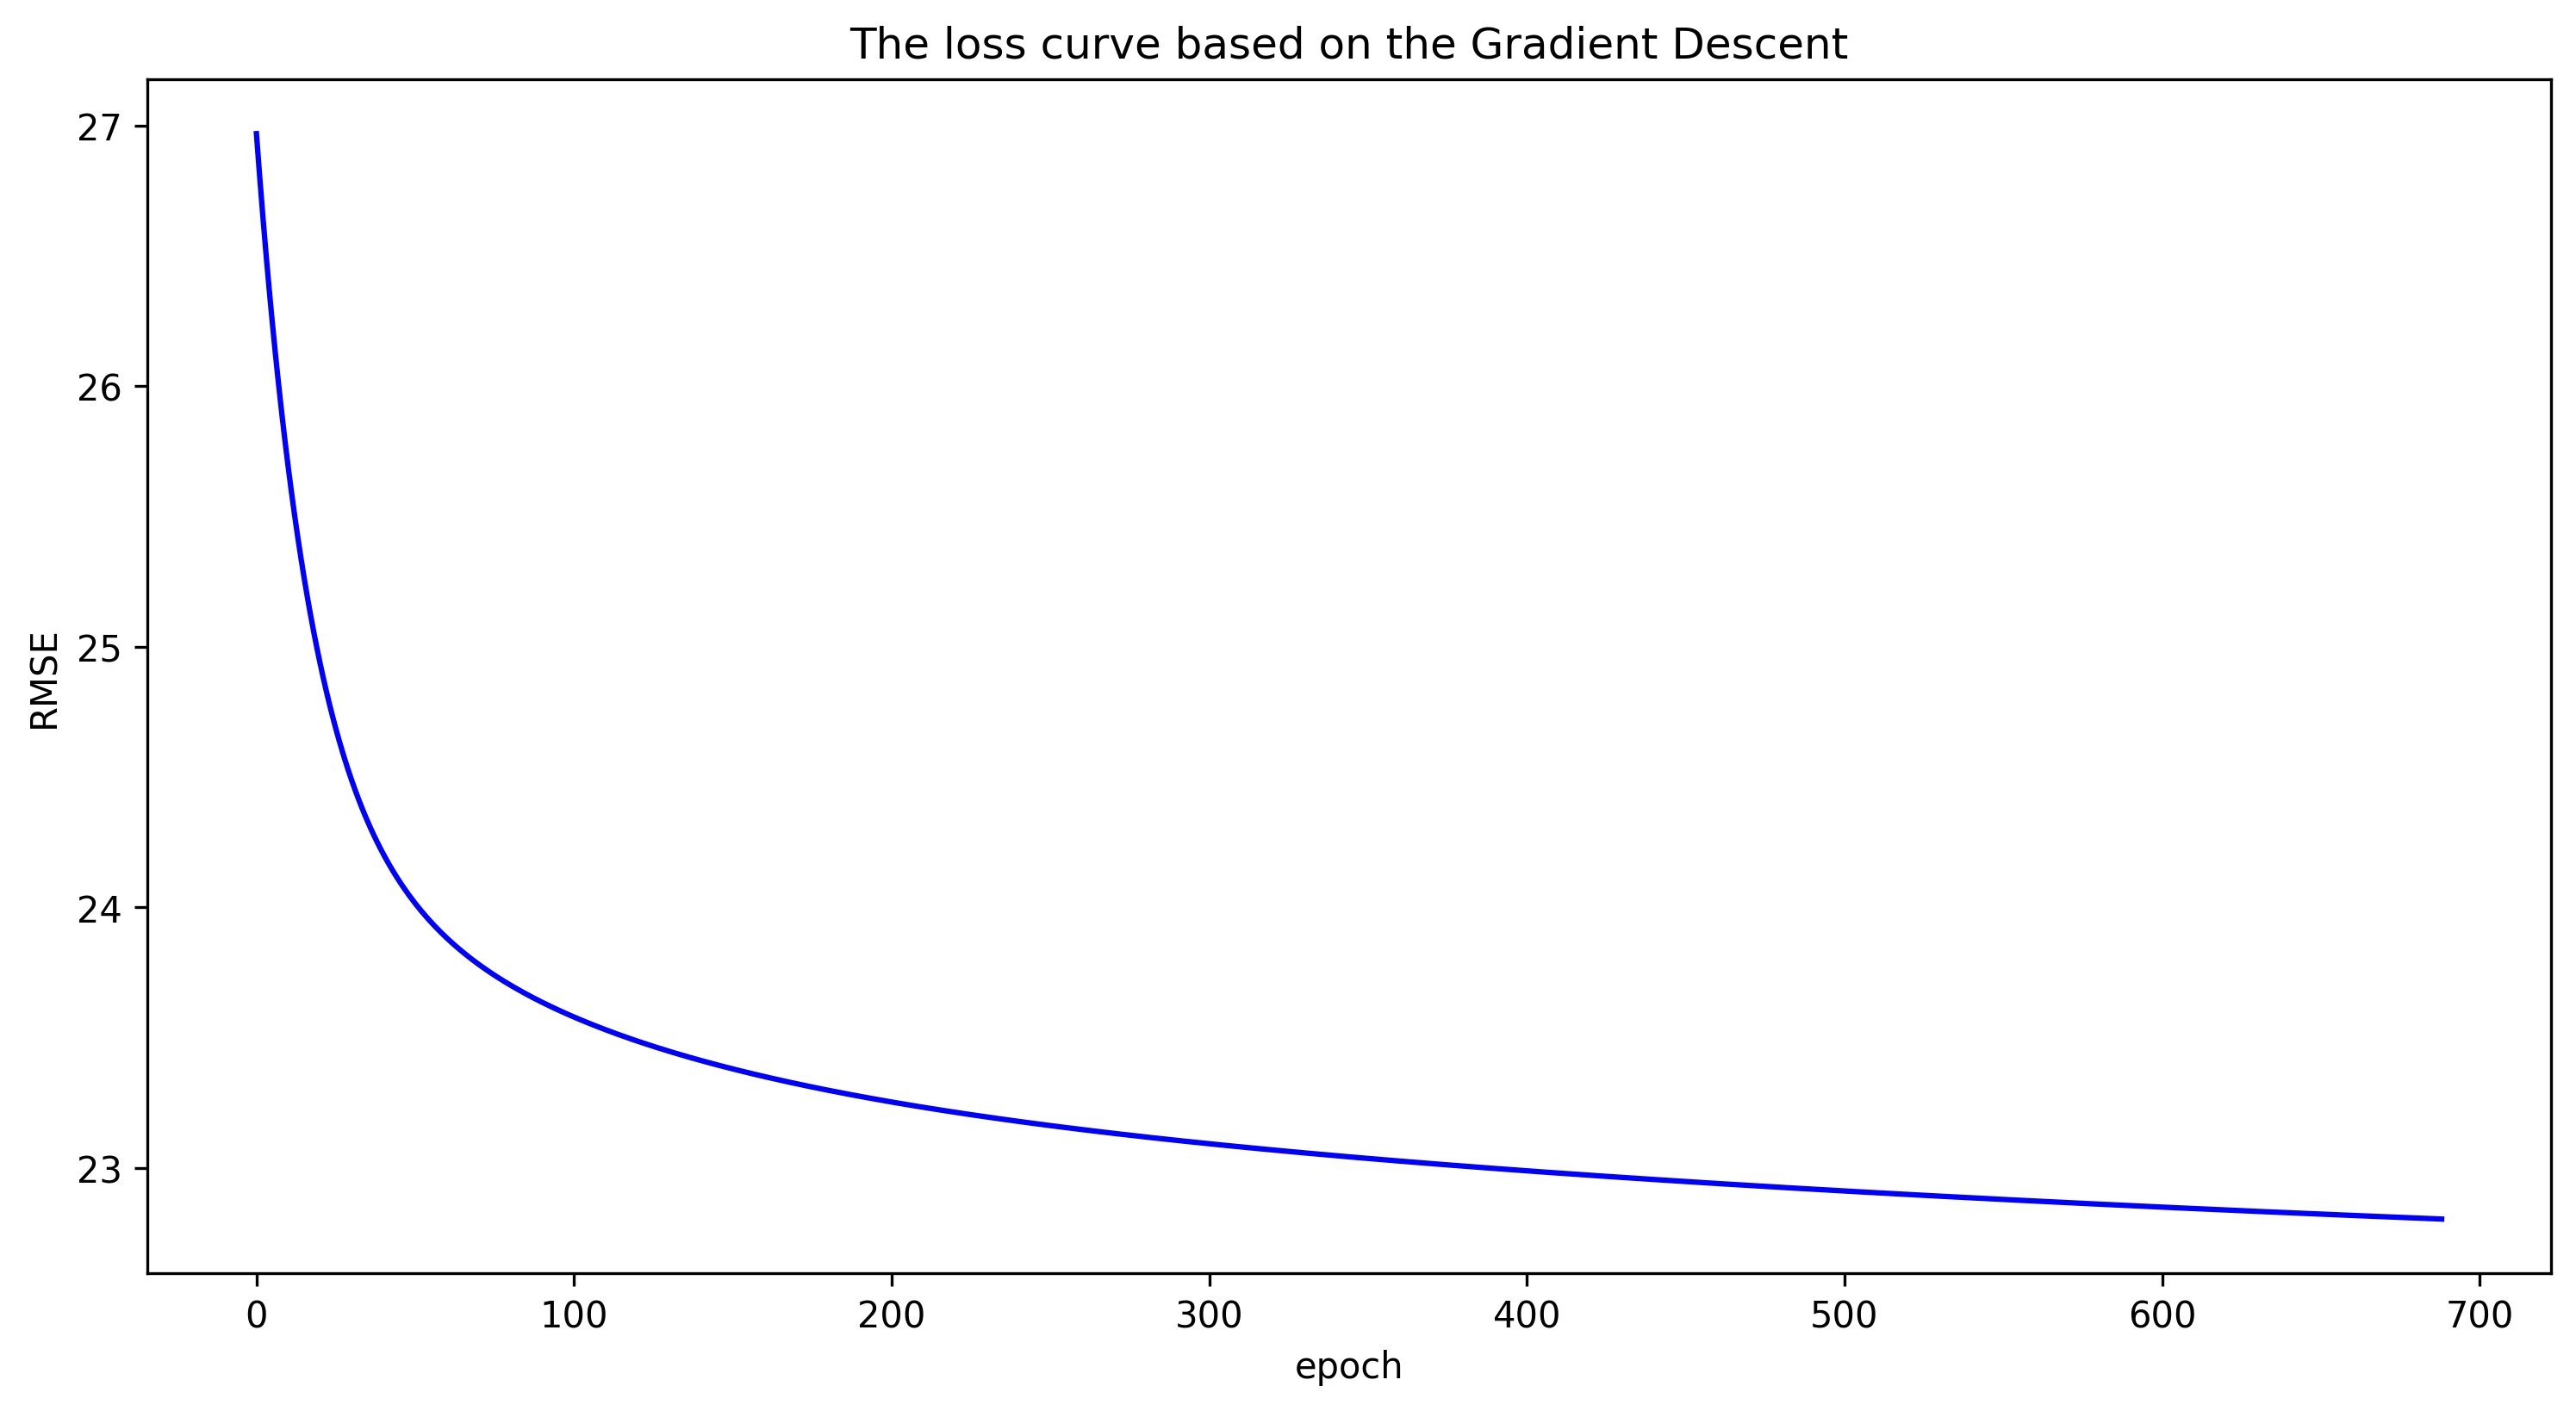

The best epoch is 688 with rmse 22.80476168424802
The rmse of test dataset is 28.4194


In [9]:
theta_gd = GD(X_train,y_train,lr=0.001,epoch=1000)
y_pred = np.dot(X_test,theta_gd)
print('The rmse of test dataset is %.4f' % np.sqrt(np.mean((np.array(y_test)-y_pred)**2)))

# Stochastic Gradient Descent

In [10]:
def SGD(X,y,lr,epoch):
    n_featuers = X.shape[1]
    n = X.shape[0]
    y = np.array(y).reshape(-1,1)
    theta = np.zeros((n_featuers,1))
    rmse_min = np.inf
    res = np.zeros((epoch,1))
    res[:] = np.inf
    count = 0
    for i in range(epoch):
        ind = np.random.randint(0,n)
        x = X.iloc[ind,:].values
        gradient = x * (np.dot(x,theta)-y[ind])
        theta0 = theta - lr * gradient.reshape(-1,1)
        y_pred = np.dot(X,theta0)
        rmse = np.sqrt(np.mean((y-y_pred)**2))
        res[i] = rmse
        if rmse < rmse_min:
            rmse_min = rmse
            theta = theta0
        if i % 100 == 0:
            print(f'The rmse of {i}th epoch is: [{np.round(rmse_min,4)}]')
        if i>1:
            if np.min(res[:i-1])-rmse_min < 0.001:
                count += 1
            else:
                count = 0
        if count > 20:
            break
    plt.figure(figsize=(12,6),dpi=300)
    plt.plot(res,c='b')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.title('The loss curve based on the Stochastic Gradient Descent')
    plt.show()
    epoch = np.argmin(res)
    print(f'The best epoch is {epoch} with rmse {rmse_min}')
    return theta

The rmse of 0th epoch is: [27.1353]
The rmse of 100th epoch is: [24.0737]
The rmse of 200th epoch is: [23.6133]
The rmse of 300th epoch is: [23.462]
The rmse of 400th epoch is: [23.3501]


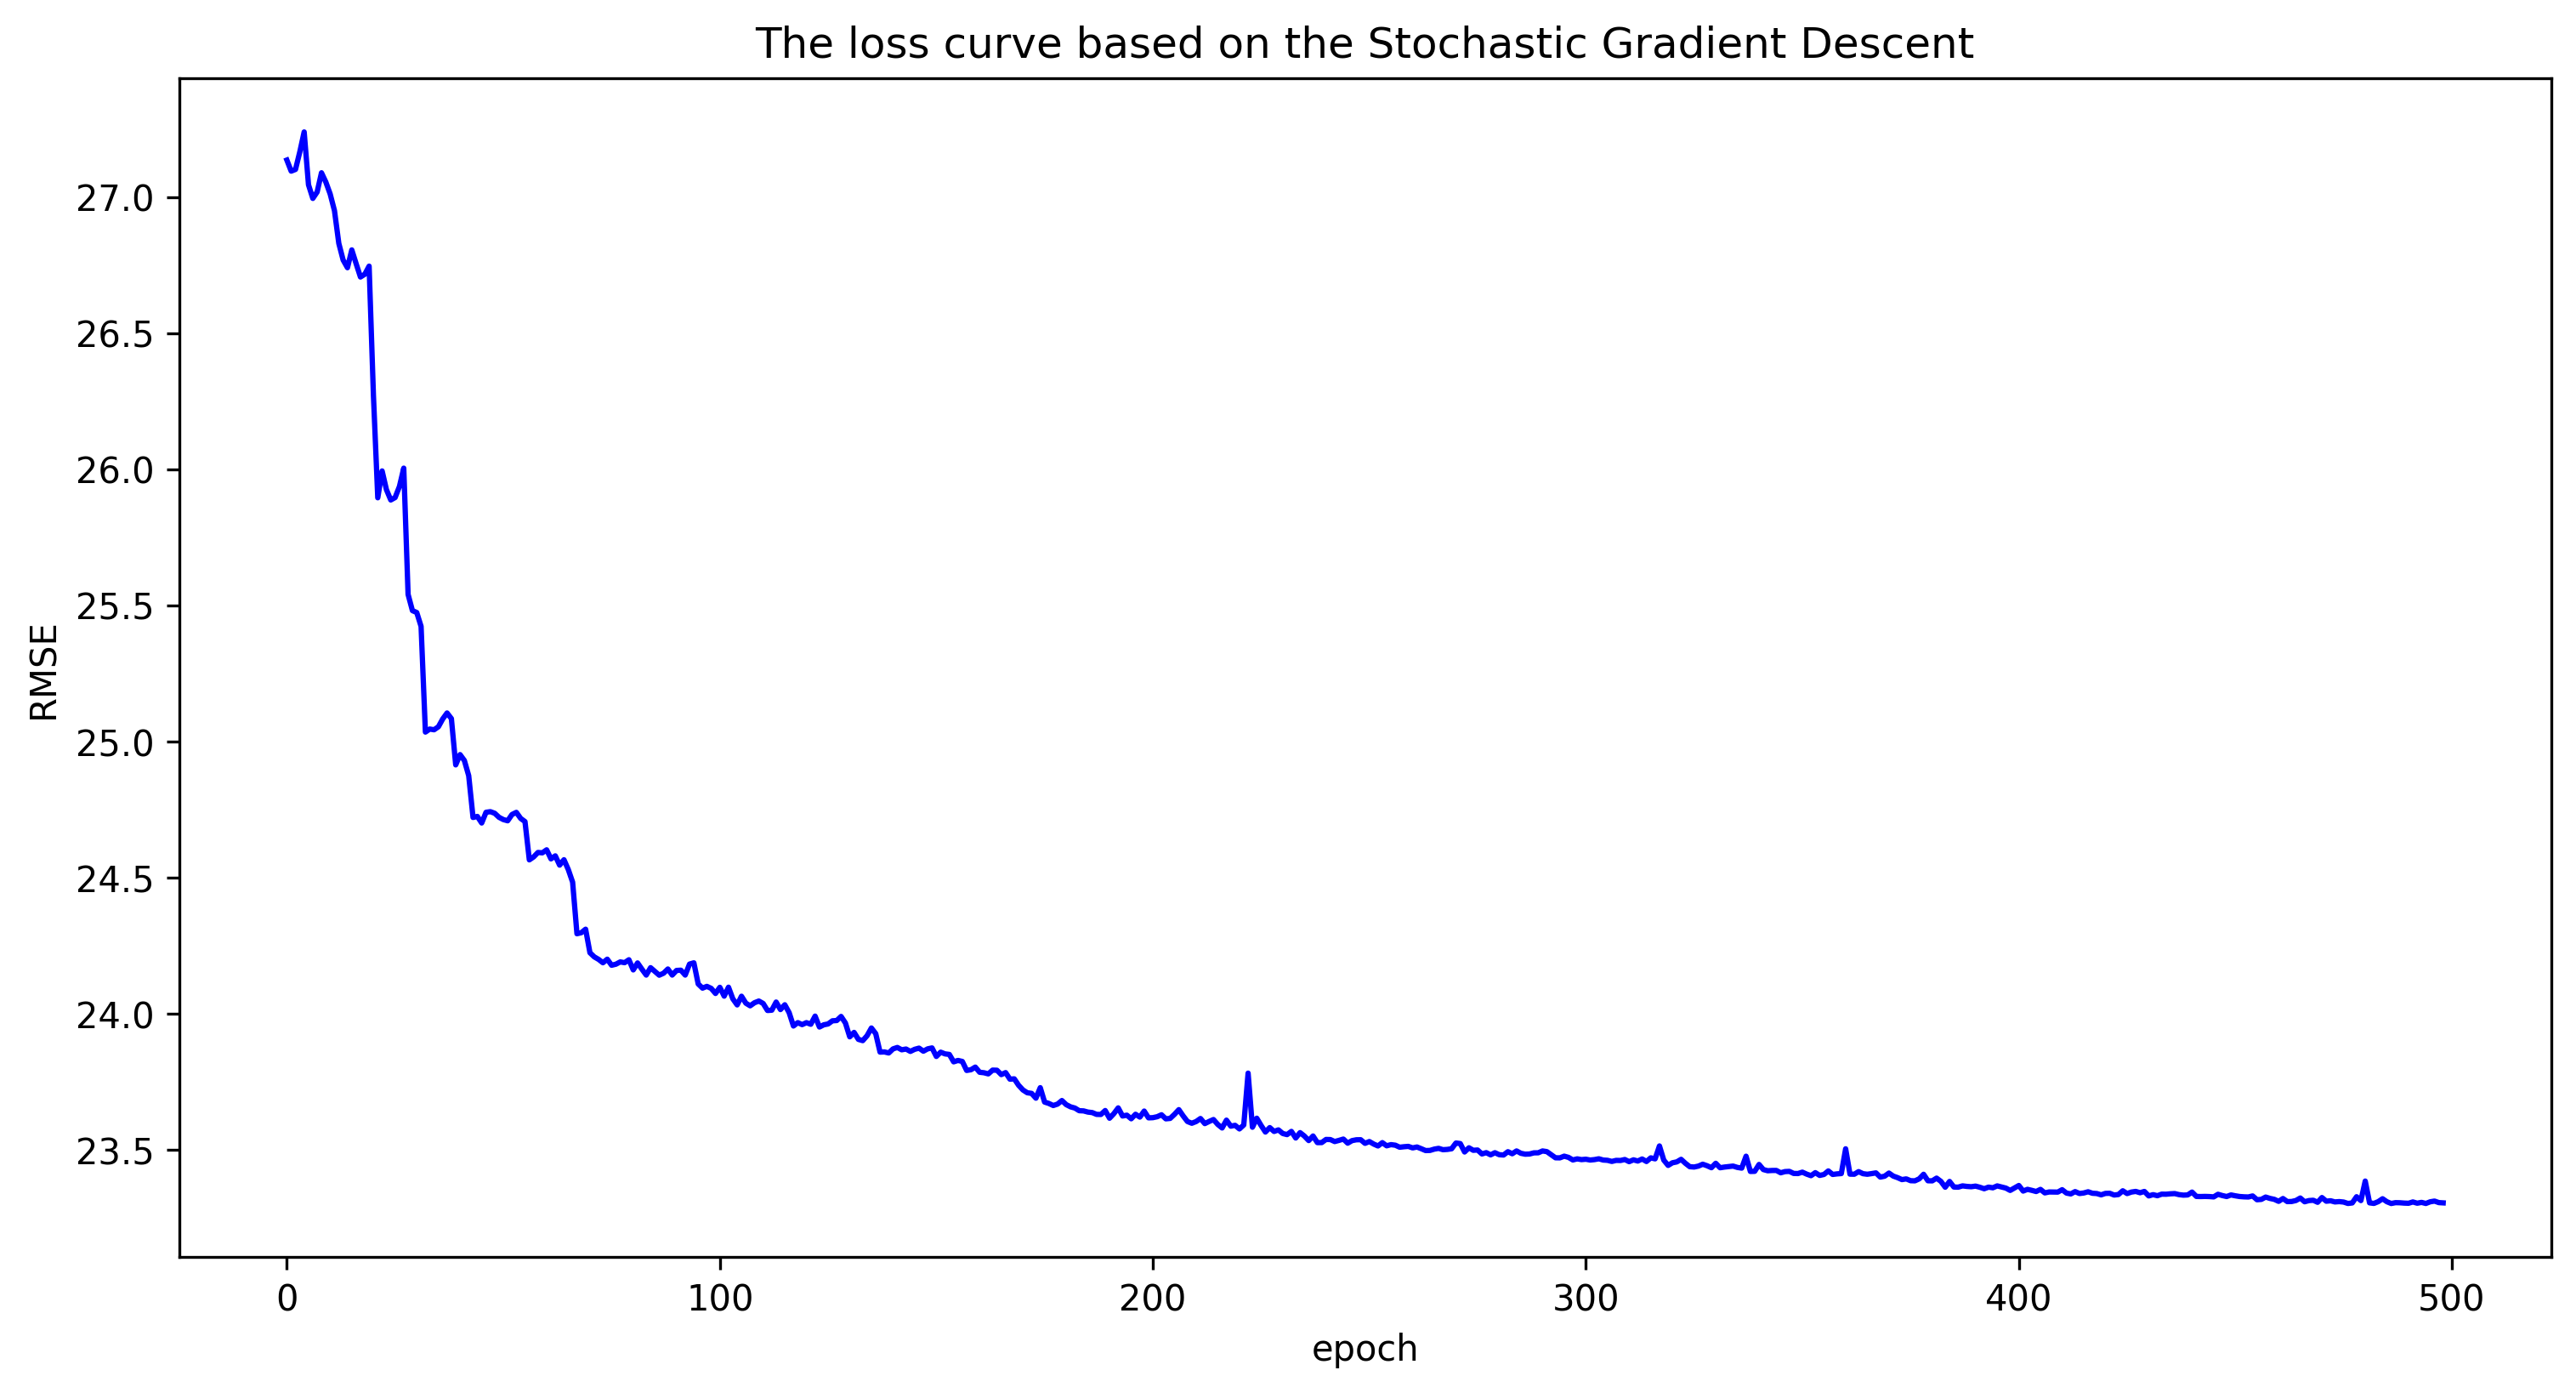

The best epoch is 486 with rmse 23.302068572386098
The rmse of test dataset is 27.6414


In [11]:
theta_sgd = SGD(X_train,y_train,lr=0.0005,epoch=2000)
y_pred = np.dot(X_test,theta_sgd)
print('The rmse of test dataset is %.4f' % np.sqrt(np.mean((np.array(y_test)-y_pred)**2)))

# Adaptive Learning Rates

In [12]:
def Adagrad(X,y,lr,epoch):
    n_featuers = X.shape[1]
    n = X.shape[0]
    y = np.array(y).reshape(-1,1)
    theta = np.zeros((n_featuers,1))
    rmse_min = np.inf
    res = np.zeros((epoch,1))
    res[:] = np.inf
    count = 0
    sigma = 0
    for t in range(epoch):
        gradient = np.dot(np.transpose(X), np.dot(X,theta)-y)
        sigma += gradient ** 2
        theta0 = theta - lr/sigma * gradient
        y_pred = np.dot(X,theta0)
        rmse = np.sqrt(np.mean((y-y_pred)**2))
        res[t] = rmse
        if rmse < rmse_min:
            rmse_min = rmse
            theta = theta0
        if t % 100 == 0:
            print(f'The rmse of {t}th epoch is: [{np.round(rmse_min,4)}]')
        if t > 1:
            if np.min(res[:t-1])-rmse_min < 0.001:
                count += 1
            else:
                count = 0
        if count > 100:
            break
    plt.figure(figsize=(12,6),dpi=300)
    plt.plot(res,c='b')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.title('The loss curve based on the Adaptive Learning Rates')
    plt.show()
    epoch = np.argmin(res)
    print(f'The best epoch is {epoch} with rmse {rmse_min}')
    return theta

The rmse of 0th epoch is: [26.147]
The rmse of 100th epoch is: [24.3177]
The rmse of 200th epoch is: [24.1707]
The rmse of 300th epoch is: [24.0924]
The rmse of 400th epoch is: [24.0392]


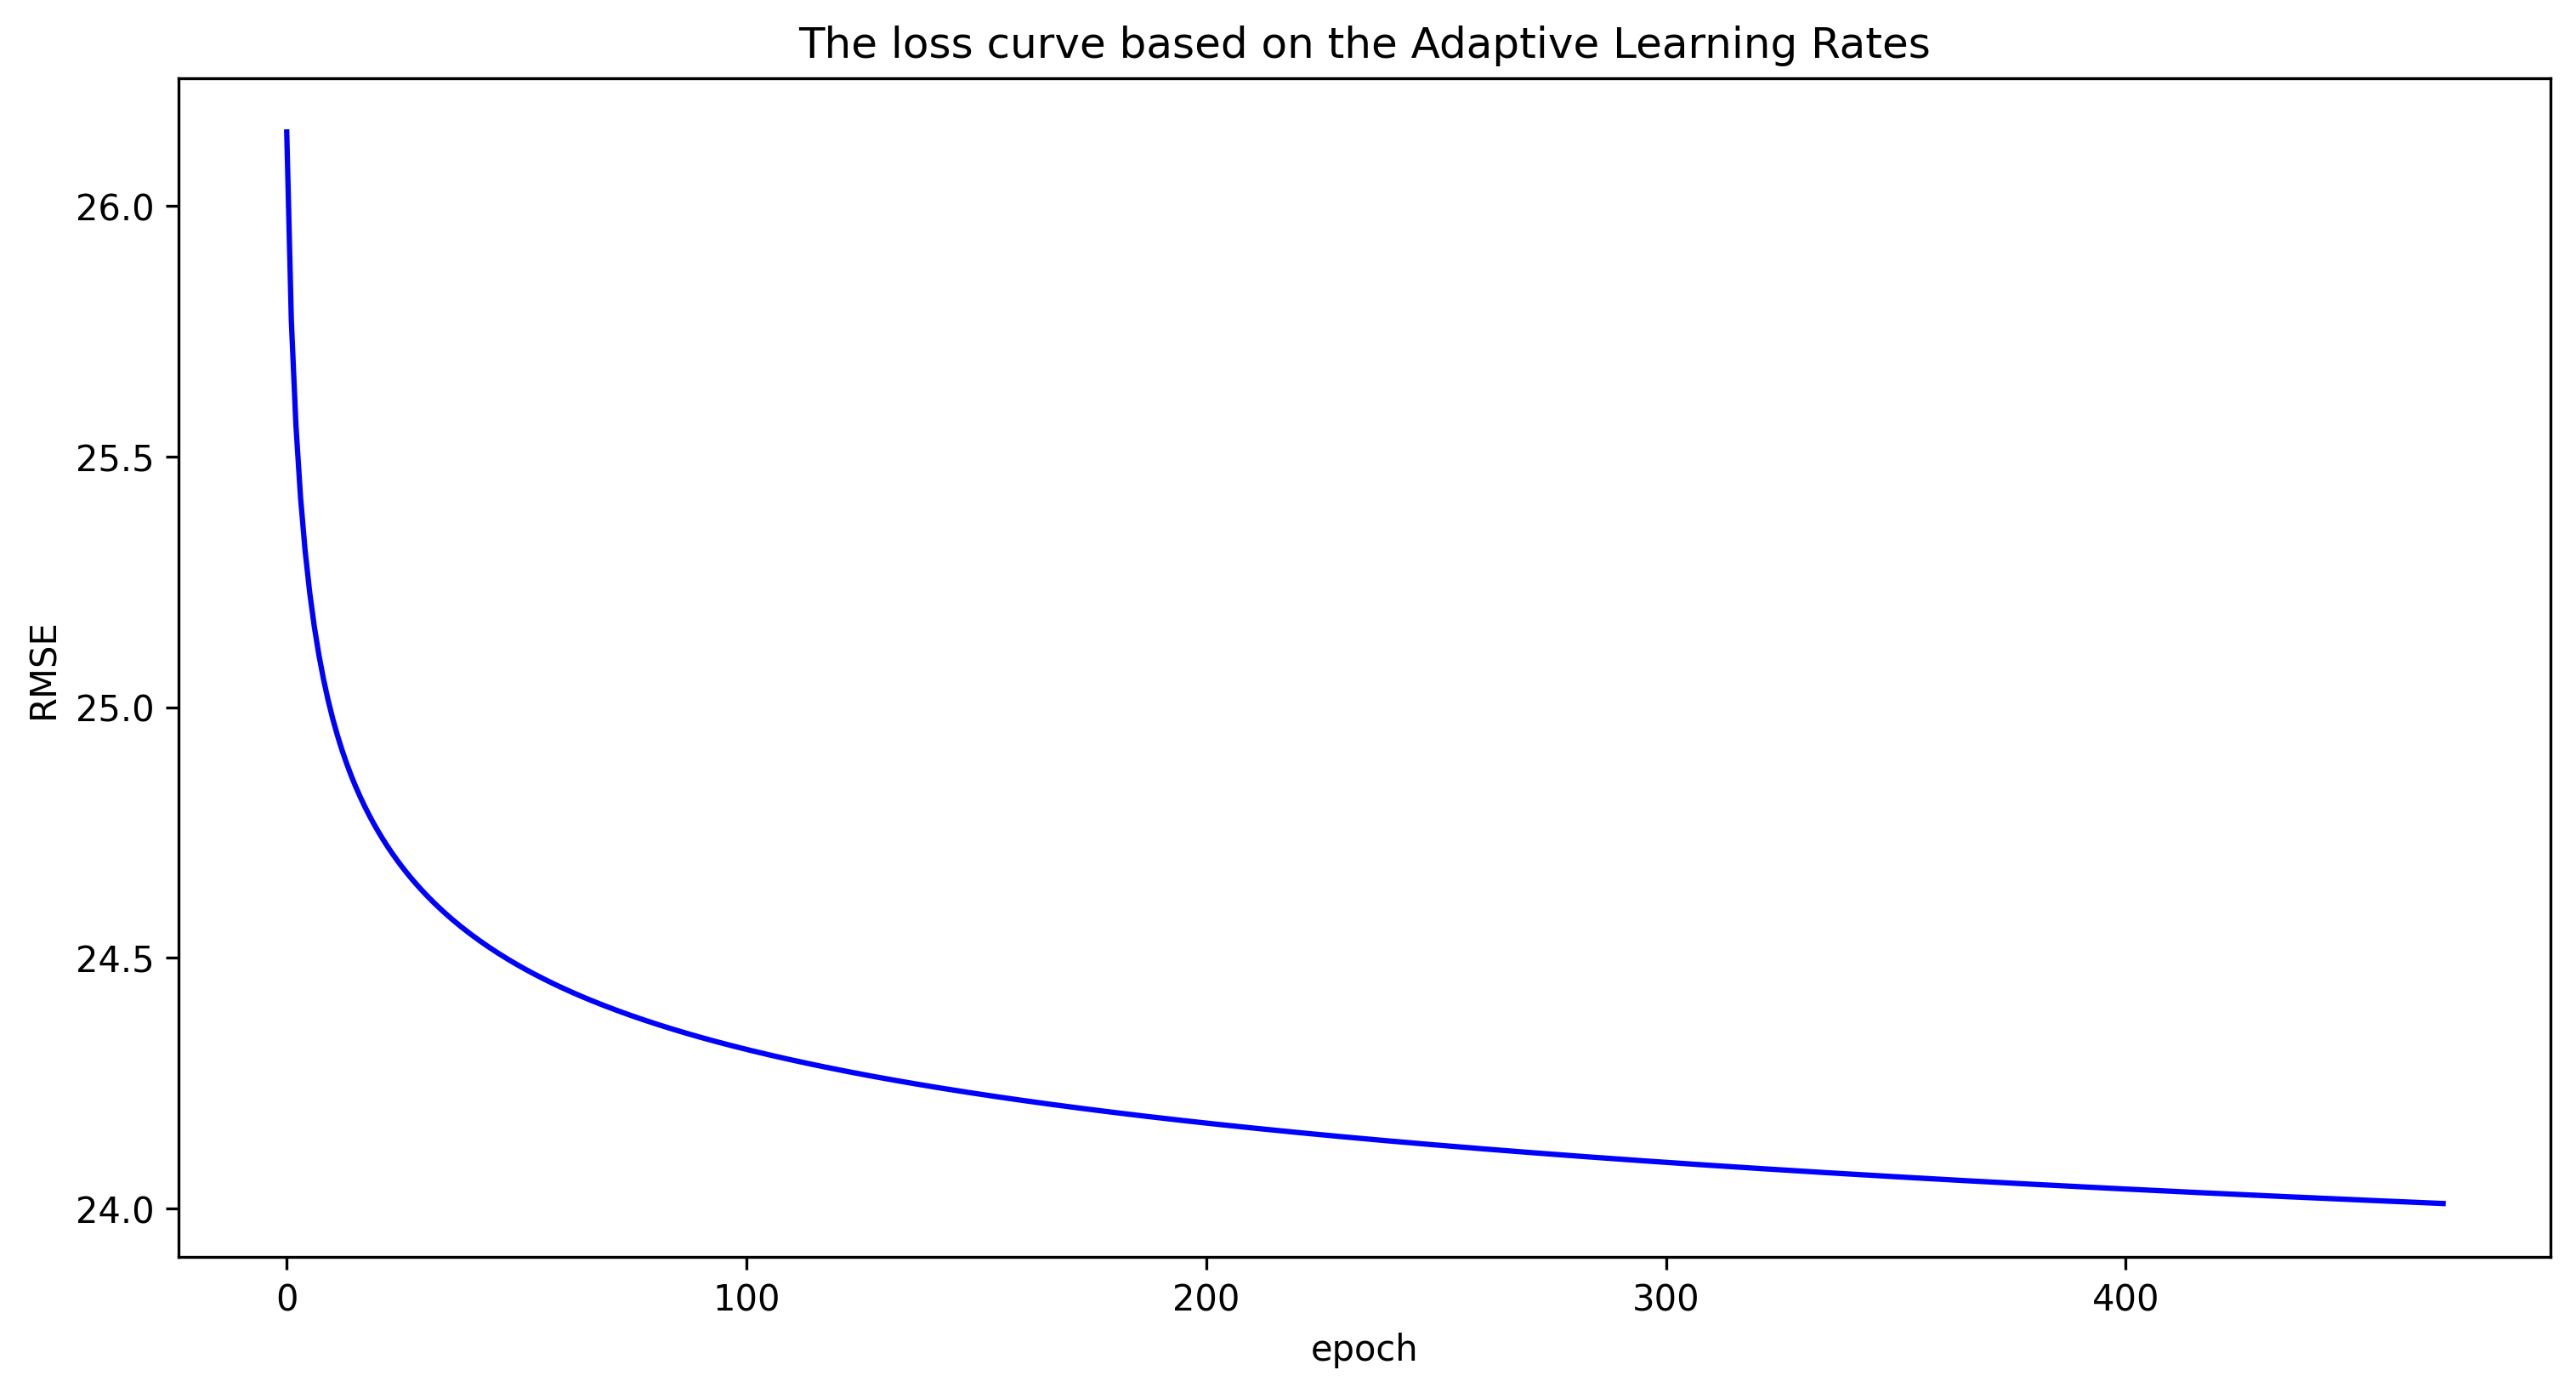

The best epoch is 469 with rmse 24.01040797022079
The rmse of test dataset is 27.4857


In [13]:
theta_ada = Adagrad(X_train,y_train,lr=1000,epoch=2000)
y_pred = np.dot(X_test,theta_ada)
print('The rmse of test dataset is %.4f' % np.sqrt(np.mean((np.array(y_test)-y_pred)**2)))